# Project 3 : Classification

## Load MNIST on Python 3.x

In [74]:
import pickle
import gzip
from sklearn.metrics import confusion_matrix

In [20]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

## Load USPS on Python 3.x

In [21]:
from PIL import Image
import os
import numpy as np

In [52]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

In [53]:
def softmax(x):
    ex = np.exp(x)
    sum_ex = np.sum( np.exp(x))
    return ex/sum_ex

### Variable Initilization

In [233]:
USPSMat = np.asarray(USPSMat)
USPSTar = np.asarray(USPSTar)
wt = np.random.rand(10,784)/10000
b = [1,1,1,1,1,1,1,1,1,1] 
traindata = training_data[0]
traintar = training_data[1]
valdata = validation_data[0]
valtar = validation_data[1]
testdata = test_data[0]
testtar = test_data[1]
t = np.zeros((50000,10))
vt = np.zeros((10000,10))
te = np.zeros((10000,10))
eta = 0.003



### One Hot Vector

In [234]:
for i in range(len(traindata)):
    t[i][traintar[i]]=1
for i in range(len(valdata)):
    vt[i][valtar[i]]=1

    

### Logistic Regression

In [235]:
for itr in range(10):
    for i in range(len(traindata)):
        z = np.dot(wt,traindata[i]) + b 
        y = softmax(z)
        E = np.dot(np.transpose((y-t[i])[np.newaxis]),traindata[i][np.newaxis])
        wt = wt - eta*E
    

### Training Accuracy on MNIST

In [236]:
right = 0
wrong = 0
for i in range(len(traindata)):
    z = np.dot(wt,traindata[i])
    y = softmax(z)
    if(np.argmax(y)==traintar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
trainacc = (right/(right+wrong))*100
print("Training Accuracy : "+ str(trainacc))

Training Accuracy : 92.28


### Validation Accuracy on MNIST

In [237]:
right = 0
wrong = 0
for i in range(len(valdata)):
    z = np.dot(wt,valdata[i])
    y = softmax(z)
    if(np.argmax(y)==valtar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
valacc = (right/(right+wrong))*100
print("Validation Accuracy : "+ str(valacc))

Validation Accuracy : 92.56


### Testing Accuracy on MNIST

In [238]:
y_pred_lr =[]
right = 0
wrong = 0
for i in range(len(testdata)):
    z = np.dot(wt,testdata[i])
    y = softmax(z)
    y_pred_lr.append(np.argmax(y))
    if(np.argmax(y)==testtar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 92.01


### Testing Accuracy on USPS 

In [88]:
y_pred_lr_usps = []
right = 0
wrong = 0
for i in range(len(USPSMat)):
    z = np.dot(wt,USPSMat[i])
    y = softmax(z)
    y_pred_lr_usps.append(np.argmax(y))
    if(np.argmax(y)==USPSTar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 33.44167208360418


### Confusion Matrix on MNIST

In [86]:
y_pred_lr = np.asarray(y_pred_lr)
y_predict = y_pred_lr
y_true = testtar
cf_lrmnist = confusion_matrix(y_true,y_predict)
print(cf_lrmnist)

[[ 954    0    1    3    0    5   10    3    4    0]
 [   0 1111    2    2    0    2    4    2   12    0]
 [   5   10  909   24    7    5   13   11   40    8]
 [   2    0   15  933    0   25    2   11   16    6]
 [   0    3    6    2  899    1   12    5    9   45]
 [   8    2    2   40    6  778   14    8   27    7]
 [   8    3    3    2    7   20  910    2    3    0]
 [   1    6   21    9    5    1    0  951    4   30]
 [   4    8    4   39    8   42    9   12  841    7]
 [   7    7    2   12   23   13    0   26    4  915]]


### Confusion Matrix on USPS

In [112]:
y_pred_lr_usps = np.asarray(y_pred_lr_usps)
y_predict = y_pred_lr_usps
y_true = USPSTar
cf_lrusps = confusion_matrix(y_true,y_predict)
print(cf_lrusps)


[[ 469    1  183  129   91  360   68  209  147  343]
 [  87  288  276  204  177  172   18  554  201   23]
 [ 102   16 1237  163   24  245   65   46   69   32]
 [  36    3  202 1085    5  537    5   59   50   18]
 [  44   31   55   55  770  175   39  381  283  167]
 [  78    9  233  216   19 1254   60   62   51   18]
 [ 131    3  588   85   46  437  634   17   14   45]
 [ 127  102   99  667   44  133   10  462  292   64]
 [ 199   15  117  373   65  712   93   75  291   60]
 [  20   60   94  563   74  102   12  562  315  198]]


## Mini Batch SGD Logistic Regression

In [373]:
wt = np.random.rand(10,784)/10000
batchsize = 50
epoch = 20
sum = 0
for j in range(epoch):
    for i in range(len(traindata)):
        z = np.dot(wt,traindata[i]) + b 
        y = softmax(z)
        E = np.dot(np.transpose((y-t[i])[np.newaxis]),traindata[i][np.newaxis])
        sum = sum + E
        if((i+1)%batchsize==0):
            wt = wt - eta*(sum/batchsize)
            sum = 0

### Testing Accuracy on MNIST

In [374]:
y_pred_lr =[]
right = 0
wrong = 0
for i in range(len(testdata)):
    z = np.dot(wt,testdata[i])
    y = softmax(z)
    y_pred_lr.append(np.argmax(y))
    if(np.argmax(y)==testtar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 90.33


### Testing Accuracy on USPS

In [288]:
y_pred_lru =[]
right = 0
wrong = 0
for i in range(len(USPSMat)):
    z = np.dot(wt,USPSMat[i])
    y = softmax(z)
    y_pred_lru.append(np.argmax(y))
    if(np.argmax(y)==USPSTar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 35.161758087904396


### Confusion Matrix on MNIST

In [290]:
y_pred_lr = np.asarray(y_pred_lr)
y_predict = y_pred_lr
y_true = testtar
cf_lrmnistmb = confusion_matrix(y_true,y_predict)
print(cf_lrmnistmb)

[[ 956    0    3    2    0    2    9    1    7    0]
 [   0 1103    2    4    1    2    4    0   19    0]
 [  11    6  889   18   15    0   17   21   45   10]
 [   5    0   17  905    1   28    4   15   24   11]
 [   1    5    5    1  904    0   11    2    8   45]
 [  15    5    6   44   14  729   16   10   44    9]
 [  16    3    5    2   12   15  899    1    5    0]
 [   3   19   28    4   11    0    0  922    4   37]
 [   9    9    9   31    8   24   13   13  844   14]
 [  10    8    6   11   44   14    0   27    7  882]]


### Confusion Matrix on USPS

In [291]:
y_pred_lru = np.asarray(y_pred_lru)
y_predict = y_pred_lru
y_true = USPSTar
cf_lruspsmb = confusion_matrix(y_true,y_predict)
print(cf_lruspsmb)

[[ 595    4  357   59  250  122  101   44  159  309]
 [ 228  303  130  354  278   54   40  307  289   17]
 [ 209   25 1181  143   65   78   95   90   91   22]
 [ 106    3  118 1283   19  233   29   59   98   52]
 [  62   81   41   63 1017  123   39  130  297  147]
 [ 174   20  211  189   45 1042  126   71   87   35]
 [ 364   12  357  112  103  224  698   23   72   35]
 [ 197  212  312  464   72   78   35  299  284   47]
 [ 226   30  144  213  128  571  118   44  446   80]
 [  44  184  161  483  149   88   15  366  342  168]]


## Neural Network

### Model Definition

In [278]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import pandas as pd
import numpy as np

input_size = 784
drop_out = 0.2
first_dense_layer_nodes  = 512
second_dense_layer_nodes = 256
third_dense_layer_nodes =10

def get_model():
    
   
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
  
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('relu'))
    
    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))

    model.summary()
    

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

### Creating Model

In [279]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total para

In [280]:
validation_data_split = 0
num_epochs = 25
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')
#TrainingData = np.transpose(TrainingData)
#TestData = np.transpose(TestData)
# Process Dataset
processedData, processedLabel = traindata, t
history = model.fit(processedData
                    , processedLabel
                    , validation_data = (valdata,vt )
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 88us/step - loss: 0.2730 - acc: 0.9156 - val_loss: 0.1233 - val_acc: 0.9636
Epoch 2/25
50000/50000 [==============================] - 4s 77us/step - loss: 0.1101 - acc: 0.9664 - val_loss: 0.0917 - val_acc: 0.9728
Epoch 3/25
50000/50000 [==============================] - 4s 78us/step - loss: 0.0751 - acc: 0.9761 - val_loss: 0.0857 - val_acc: 0.9760
Epoch 4/25
50000/50000 [==============================] - 5s 96us/step - loss: 0.0597 - acc: 0.9818 - val_loss: 0.0839 - val_acc: 0.9756
Epoch 5/25
50000/50000 [==============================] - 5s 105us/step - loss: 0.0504 - acc: 0.9844 - val_loss: 0.0791 - val_acc: 0.9807
Epoch 6/25
50000/50000 [==============================] - 4s 82us/step - loss: 0.0421 - acc: 0.9868 - val_loss: 0.0893 - val_acc: 0.9780
Epoch 7/25
50000/50000 [==============================] - 4s 74us/step - loss: 0.0363 - acc: 0.9887 - val_loss: 0.0808 - val_ac

### Training and Validation Graphs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3c1fdc50>,
      dtype=object)

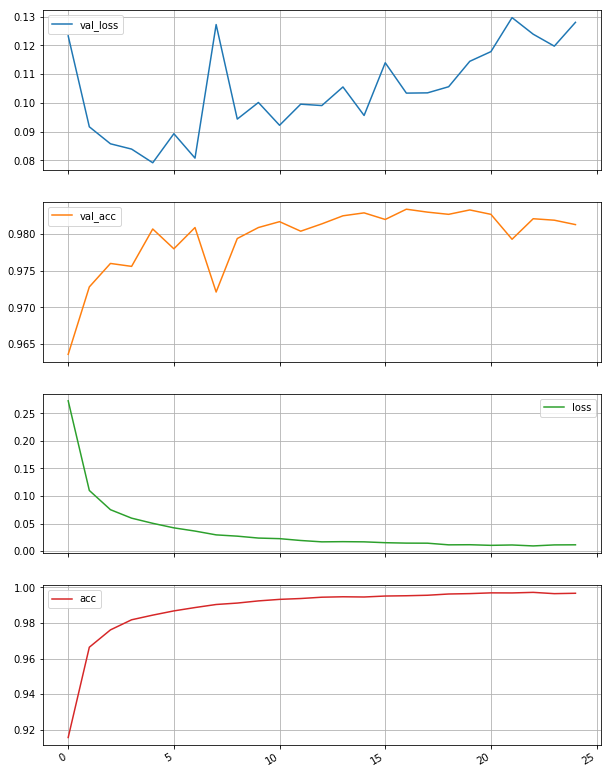

In [281]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

### Testing Accuracy on MNIST

In [282]:
y = model.predict(testdata)


In [283]:
right = 0
wrong = 0
y_pred_nn =[]
for i in range(len(testdata)):
    y_pred_nn.append(np.argmax(y[i]))
    if(np.argmax(y[i])==testtar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 98.24000000000001


### Training Accuracy on MNIST

In [284]:
traindata.shape
ytr = model.predict(traindata)
right = 0
wrong = 0
y_pred_nntr =[]
for i in range(len(traindata)):
    #y_pred_nn.append(np.argmax(y[i]))
    if(np.argmax(ytr[i])==traintar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
tracc = (right/(right+wrong))*100
print("Training Accuracy : "+ str(tracc))


Training Accuracy : 99.872


### Validation Accuracy

In [285]:
yv = model.predict(valdata)
right = 0
wrong = 0
y_pred_nntr =[]
for i in range(len(valdata)):
    #y_pred_nn.append(np.argmax(y[i]))
    if(np.argmax(yv[i])==valtar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
valacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(valacc))

Testing Accuracy : 98.13


### Testing Accuracy on USPS

In [104]:
y = model.predict(USPSMat)

In [115]:
right = 0
wrong = 0
y_pred_nn_usps =[]
for i in range(len(USPSTar)):
    y_pred_nn_usps.append(np.argmax(y[i]))
    if(np.argmax(y[i])==USPSTar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 42.912145607280365


### Confusion Matrix on MNIST

In [116]:
y_predict = y_pred_nn
y_true = testtar
cf_nnmnist = confusion_matrix(y_true,y_predict)
print(cf_nnmnist)

[[ 972    1    0    1    0    2    2    1    1    0]
 [   0 1130    2    0    0    1    2    0    0    0]
 [   4    2 1007    4    1    0    2    7    5    0]
 [   0    0    3  992    0    7    0    3    2    3]
 [   3    0    2    0  951    0    7    1    2   16]
 [   2    0    0    5    0  877    3    0    3    2]
 [   2    3    0    0    2    7  943    0    0    1]
 [   1    8    9    1    1    0    0  998    2    8]
 [   0    1    1    5    1    7    2    2  951    4]
 [   0    2    0    6    4    6    1    2    3  985]]


### Confusion Matrix on USPS

In [117]:
y_pred_nn_usps = np.asarray(y_pred_nn_usps)
y_predict = y_pred_nn_usps
y_true = USPSTar
cf_nnusps = confusion_matrix(y_true,y_predict)
print(cf_nnusps)


[[ 390    3  283   42  159  207  435  179   94  208]
 [  49  470  534  110  301   89   37  214  115   81]
 [  82    4 1537   33   14  100  146   34   44    5]
 [  22    1  482 1039    6  332   38   19   41   20]
 [   9   70  102   13 1140  145   73  250  154   44]
 [  14    0  367   52    2 1314  183   18   40   10]
 [  68   10  369    5   17  102 1205  120   15   89]
 [  15  239  334  297   53   56   56  772  169    9]
 [  76   16  291  280   59  398  227  145  483   25]
 [   2  111  177  219  168   29   29  760  273  232]]


### Processing Dataset (Training = 60000 and Test = 10000)

In [69]:
traindata = np.concatenate((traindata,valdata),axis =0)
traintar = np.concatenate((traintar,valtar),axis =0)
t = np.concatenate((t,vt),axis=0)

## SVM using Linear Kernal

In [70]:
from sklearn.svm import LinearSVC

In [71]:
linear_svm = LinearSVC()
linear_svm.fit(traindata, traintar)
y_pred_svm = linear_svm.predict(testdata)


In [123]:
y_pred_svmusps = linear_svm.predict(USPSMat)


### Testing Accuracy on MNIST

In [119]:
right = 0
wrong = 0
for i in range(len(testdata)):
    if(y_pred_svm[i]==testtar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 91.78


### Testing Accuracy on USPS

In [125]:
right = 0
wrong = 0
for i in range(len(USPSTar)):
    if(y_pred_svmusps[i]==USPSTar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 26.71633581679084


### Confusion Matrix on MNIST

In [120]:
y_predict = y_pred_svm
y_true = testtar
cf_svmmnist = confusion_matrix(y_true,y_predict)
print(cf_svmmnist)

[[ 961    0    2    1    1    4    6    3    1    1]
 [   0 1112    3    2    0    1    5    1   11    0]
 [  11   11  911   18   10    4   13   12   39    3]
 [   4    0   19  918    2   22    5   12   20    8]
 [   1    4    5    4  913    0    9    3    5   38]
 [   9    2    0   39   12  767   18    7   30    8]
 [   7    4    7    2    5   21  909    1    2    0]
 [   2    8   23    5    7    1    1  948    5   28]
 [  11   13    8   20   14   31    8   13  843   13]
 [   7    8    2   15   31   12    0   26   12  896]]


### Confusion Matrix on USPS

In [124]:
y_pred_svmusps = np.asarray(y_pred_svmusps)
y_predict = y_pred_svmusps
y_true = USPSTar
cf_nnusps = confusion_matrix(y_true,y_predict)
print(cf_nnusps)

[[ 381    1  348  233   51  161  111  572   60   82]
 [  46  280  658  158  362   96   28  284   67   21]
 [  75   56 1243  104   38  202  155   86   20   20]
 [  46   34  423  753   19  527   37   89   41   31]
 [  64   52  176  120  556  183   67  604  138   40]
 [  49   27  752  199   20  716   80  125   24    8]
 [  86    8  698  106   51  392  507   85   17   50]
 [ 149   95  235  447   92  136   28  694   95   29]
 [ 207   28  155  619  121  371  104  238  117   40]
 [  48   56  140  524  101   80   11  768  176   96]]


## SVM using RBF Kernel and Gamma = 0.05 and C = 5

In [215]:
from sklearn import svm

In [216]:
classifier1 = svm.SVC(kernel='rbf',gamma=0.05,C=5)
#classifier = svm.SVC()


# We learn the digits on the first half of the digits
classifier1.fit(traindata,traintar)

# Now predict the value of the digit on the second half:
#expected = label_test
predicted1 = classifier1.predict(testdata)

In [217]:
right = 0
wrong = 0
for i in range(len(testdata)):
    if(predicted1[i]==testtar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 98.28


In [231]:
predicted1usps = classifier1.predict(USPSMat)

In [242]:
right = 0
wrong = 0
for i in range(len(USPSTar)):
    if(predicted1usps[i]==USPSTar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 26.136306815340767


### Confusion Matrix on MNIST

In [222]:
y_predict = predicted1
y_true = testtar
cf_svmmnistcon = confusion_matrix(y_true,y_predict)
print(cf_svmmnistcon)

[[ 974    0    1    0    0    1    1    1    2    0]
 [   0 1128    3    1    0    1    0    1    1    0]
 [   4    0 1015    1    1    0    0    6    5    0]
 [   0    0    1  996    0    4    0    5    4    0]
 [   0    1    3    0  965    0    4    0    2    7]
 [   2    0    1    7    1  872    3    1    4    1]
 [   5    2    0    0    2    3  945    0    1    0]
 [   0    3    9    1    1    0    0 1004    2    8]
 [   2    0    1    6    1    2    0    2  958    2]
 [   4    4    2    8    6    2    0    6    6  971]]


### Confusion Matrix on USPS

In [252]:
y_predict = predicted1usps
y_true = USPSTar
cf_svmmnistconu = confusion_matrix(y_true,y_predict)
print(cf_svmmnistconu)

[[ 226    0 1564    2   26   35    2    0   79   66]
 [  78  257  712  173  264   77   12  335   88    4]
 [   8    0 1944    6    3   20    1    6   11    0]
 [   4    0 1195  725    0   41    0    0   35    0]
 [   6    0 1045   18  521   96    0   57  252    5]
 [  15    0 1305   17    1  625    0    0   37    0]
 [  78    0 1534    2   10   61  290    0   22    3]
 [  17    6 1433  129    6  134    0  222   52    1]
 [   7    0 1387   14    4  221    0    0  367    0]
 [   1    0 1510   79   26   29    0   39  266   50]]


## SVM using rbf Kernel with default parameters.

In [218]:
classifier2 = svm.SVC(kernel='rbf')
#classifier = svm.SVC()


# We learn the digits on the first half of the digits
classifier2.fit(traindata,traintar)

# Now predict the value of the digit on the second half:
#expected = label_test
predicted2 = classifier2.predict(testdata)

In [219]:
right = 0
wrong = 0
for i in range(len(testdata)):
    if(predicted2[i]==testtar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 94.35


In [240]:
predicted2u = classifier2.predict(USPSMat)

In [241]:
right = 0
wrong = 0
for i in range(len(USPSTar)):
    if(predicted2u[i]==USPSTar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 38.54192709635482


### Confusion Matrixon MNIST

In [223]:
y_predict = predicted2
y_true = testtar
cf_svmmnistcon2 = confusion_matrix(y_true,y_predict)
print(cf_svmmnistcon2)

[[ 967    0    1    0    0    5    4    1    2    0]
 [   0 1120    2    3    0    1    3    1    5    0]
 [   9    1  962    7   10    1   13   11   16    2]
 [   1    1   14  950    1   17    1   10   11    4]
 [   1    1    7    0  937    0    7    2    2   25]
 [   7    4    5   33    7  808   11    2   10    5]
 [  10    3    4    1    5   10  924    0    1    0]
 [   2   13   22    5    7    1    0  954    4   20]
 [   4    6    6   14    8   24   10    8  891    3]
 [  10    6    0   12   33    5    1   14    6  922]]


### Confusion Matrix USPS

In [256]:
y_predict = predicted2u
y_true = USPSTar
cf_svmmnistcon2usps = confusion_matrix(y_true,y_predict)
print(cf_svmmnistcon2usps)

[[ 573    2  428   19  285  248   73   44    6  322]
 [ 110  429  285  137  273  180   46  501   22   17]
 [ 128   18 1402   59   39  198   61   57   23   14]
 [  76    3  186 1123   11  483    5   70   27   16]
 [  18   67   91   14 1167  267   22  194   69   91]
 [ 108   17  257  102   25 1367   60   43   15    6]
 [ 197    7  489   24   98  394  748   13    7   23]
 [  50  225  457  265   57  416   15  452   41   22]
 [  73   25  209  193   87 1006   95   41  244   27]
 [  26  166  228  278  213  165    8  499  214  203]]


## SVM using rbf Kernel and gamma = 1

In [220]:
classifier = svm.SVC(kernel='rbf',gamma=1)
#classifier = svm.SVC()


# We learn the digits on the first half of the digits
classifier.fit(traindata,traintar)

# Now predict the value of the digit on the second half:
#expected = label_test
predicted = classifier.predict(testdata)

In [221]:
right = 0
wrong = 0
for i in range(len(testdata)):
    if(predicted[i]==testtar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 17.59


In [253]:
predictedusps = classifier.predict(USPSMat)
right = 0
wrong = 0
for i in range(len(USPSTar)):
    if(predictedusps[i]==USPSTar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testaccusps = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testaccusps))


Testing Accuracy : 10.000500025001251


### Confusion Matrix on MNIST

In [224]:
y_predict = predicted
y_true = testtar
cf_svmmnistco = confusion_matrix(y_true,y_predict)
print(cf_svmmnistco)

[[   0    0    0    0    0    0    0  980    0    0]
 [   0  731    0    0    0    0    0  404    0    0]
 [   0    0    0    0    0    0    0 1032    0    0]
 [   0    0    0    0    0    0    0 1010    0    0]
 [   0    0    0    0    0    0    0  982    0    0]
 [   0    0    0    0    0    0    0  892    0    0]
 [   0    0    0    0    0    0    0  958    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0 1009    0    0]]


### Confusion Matrix on USPS

In [254]:
y_predict = predictedusps
y_true = USPSTar
cf_svmmnistcousps = confusion_matrix(y_true,y_predict)
print(cf_svmmnistcousps)

[[   0    0    0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0    0 1999    0    0]
 [   0    0    0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0    0 2000    0    0]]


## Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier



In [226]:
clf_rf = RandomForestClassifier()
clf_rf.fit(traindata, traintar)
y_pred_rf = clf_rf.predict(testdata)
y_pred_u = clf_rf.predict(USPSMat)

### Testing Accuracy on MNIST

In [128]:
right = 0
wrong = 0
for i in range(len(testdata)):
    if(y_pred_rf[i]==testtar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 94.6


### Testing Accuracy on USPS

In [227]:
right = 0
wrong = 0
for i in range(len(testdata)):
    if(y_pred_u[i]==USPSTar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 39.67


### Confusion Matrix on MNIST

In [129]:
y_predict = y_pred_rf
y_true = testtar
cf_rfmnist = confusion_matrix(y_true,y_predict)
print(cf_rfmnist)

[[ 967    0    0    2    0    2    5    2    2    0]
 [   0 1121    5    2    0    1    2    0    4    0]
 [   8    3  985    8    3    0    2   11   11    1]
 [   1    0   18  940    2   16    0   12   18    3]
 [   3    1    4    3  933    0    8    4    4   22]
 [   8    4    4   36    8  812    5    3    8    4]
 [   6    3    2    0    8   10  925    0    4    0]
 [   4    8   21   10    6    1    0  963    3   12]
 [   7    2   14   20   13   12    7    5  888    6]
 [   6    9    7   16   19   10    2    9    5  926]]


### Confusion Matrix on USPS

In [228]:
y_predict = y_pred_u
y_true = USPSTar
cf_rfusps = confusion_matrix(y_true,y_predict)
print(cf_rfusps)

[[664  54 304 113 352 125  80 134  14 160]
 [ 78 494 168 110 218  95  37 747  20  33]
 [259 109 931 116  99 183  80 176  31  15]
 [123  48 190 926  91 386  31 121  24  60]
 [ 33 216 116  90 951 154  41 305  36  58]
 [285  88 168 239  68 913  67 119  21  32]
 [418  91 338 107 160 288 460  86  27  25]
 [140 410 304 256  76 191  45 541  14  23]
 [187 125 287 239 159 637  96  92 133  45]
 [ 80 282 313 300 245 141  37 421  68 113]]


## Ensemble Classifier

### Logistic Regression + Linear SVM + Neural Network + Random Forest ( Majority Voting) on MNIST

In [265]:

fpm = []
for i in range(len(testdata)):
    classp = np.zeros(10)
    classp[y_pred_lr[i]] += 1
    classp[y_pred_nn[i]] += 1
    classp[y_pred_svm[i]] += 1
    classp[y_pred_rf[i]] +=1
    fpm.append(np.argmax(classp))
    
    

In [266]:
fpm = np.asarray(fpm)
right = 0
wrong = 0
for i in range(len(testdata)):
    if(fpm[i]==testtar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 95.30999999999999


### Logistic Regression + Linear SVM + Neural Network + Random Forest ( Majority Voting) on USPS

In [260]:

fp = []
for i in range(len(USPSTar)):
    classp = np.zeros(10)
    classp[y_pred_lr_usps[i]] += 1
    classp[y_pred_nn_usps[i]] += 1
    classp[y_pred_svmusps[i]] += 1
    classp[y_pred_u[i]] +=1
    fp.append(np.argmax(classp))

fp = np.asarray(fp)
right = 0
wrong = 0
for i in range(len(USPSTar)):
    if(fp[i]==USPSTar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 36.60183009150458


### Confusion Matrix on MNIST

In [269]:
y_predict = fpm
y_true = testtar
cf_emnist = confusion_matrix(y_true,y_predict)
print(cf_emnist)

[[ 971    1    1    0    0    2    2    1    2    0]
 [   0 1127    3    1    0    1    2    1    0    0]
 [   7    7  990    5    2    2    3    8    7    1]
 [   2    0   17  974    0    7    0    4    5    1]
 [   1    2    3    2  950    0    5    1    3   15]
 [   6    1    1   34    8  824    9    0    8    1]
 [   8    3    2    2    6   16  921    0    0    0]
 [   2    6   22    5    6    1    0  974    2   10]
 [   6    7    6   23   10   24    9   10  873    6]
 [   7    7    3   14   22    7    0   16    6  927]]


### Confusion Matrix on USPS

In [267]:
y_predict = fp
y_true = USPSTar
cf_eusps = confusion_matrix(y_true,y_predict)
print(cf_eusps)

[[ 610   11  354  127  152  180   93  240   57  176]
 [  78  433  515  148  266  110   15  362   65    8]
 [ 119   28 1463   73   16  151   75   39   25   10]
 [  52    6  413 1054    4  374   18   42   23   14]
 [  47  114  136   60 1008  135   31  290  137   42]
 [ 101   25  450  176    4 1132   50   38   18    6]
 [ 189   26  623   58   44  308  665   40    7   40]
 [ 162  253  229  450   37  108   21  608  121   11]
 [ 234   37  242  431   66  554   92  107  208   29]
 [  39  144  182  455   90   57    7  672  215  139]]
